# Dealing with Missing Data

## Introduction

In this lesson, we'll learn about various strategies for detecting and dealing with missing data using Pandas.  

## Objectives
You will be able to:
* Detect missing data in Pandas using .describe(), .summary(), .isnull and .notnull
* Replace/drop missing data in Pandas using .fillna and .dropna


## Why is Missing Data a Problem?

Missing data can be problematic during the data science process because null values in our dataset limit our ability to do important things like:

* Convert data types
* Calculate summary statistics
* Visualize Data
* Build models

## Detecting Missing Data

There are two main ways missing data is often represented in data sets.

### NaNs

By default, pandas represents null values with `NaN`, which is short for **_Not a Number_**.  Pandas provides many great ways for checking for null values, built right into DataFrames and Series objects.

#### Example--Detecting Null Values

```python
df.isna()
```

Returns a matrix of boolean values, where all cells containing `NaN` are converted to `True`, and all cells containing valid data are converted to `False`

```python
df.isna().sum()
```

Since `True` is equivalent to `1` and `False` is equivalent to `0` in python, taking the `.sum()` of the DataFrame (or Series) will return the total number of `NaN` values in the dataset.  Pandas even breaks this down by column--see the example output below.


### Placeholder Values

Often, datasets will contain missing values that are denoted by a value that seems valid to pandas.  This is very common in real-world datasets--often, people entering the data are required to enter values that they don't actually have, so they enter an agreed-upon placeholder value.  

The easiest way to deal with these is to familiarize yourself with the data dictionary that corresponds to your data set--any placeholder values meant to denote a null value will be specified here. 

However, you'll encounter plenty of data sets in the real world that don't come with a data dictionary, or that fail to mention placeholder values.  

Follow these strategies for detecting placeholder values in your data. 


#### Numerical Data

Numerical columns will often represent missing values with a value that is nonsensical to the column in question.  For instance, in healthcare data, missing values in a `Weight` column may be using impossible values such as `0` or `9999`.  These are valid to the computer, since they are real-numbered, but are obvious to anyone analyzing the data as placeholder values.  

These are the most difficult to check for, since this requires getting decently familiar with the column in question enough to notice values that are technically valid but pragmatically impossible. 

To detect these sorts of placeholder values, start by checking for outliers--they are often encoded as very large numbers, or as 0 (when 0 isn't a realistic value for the column in question).  Any good placeholder value will be a value that couldn't show up in the real world.  

Another way to confirm these values is to check the `value_counts`.  In a continuously-valued column, it is probably rare for one specific value to overwhelm all the others.  If, for instance, you see the same numerical value showing up a statistically improbable number of times, double-check that this value is real--placeholder values have the potential to show up many times, but it's much less likely for real-valued numbers.  


#### Categorical Data

To detect placeholder values in categorical data, get the unique values in the column and see if there are any values that don't match up with your expectations.  Pandas provides a built-in method for this.  For instance, in the titanic dataset, we can check the unique values of the `Embarked` column by typing:

```python
df['Embarked'].unique()
```

This will return an array containing all the unique values in the dataset.  

Note that for categorical columns, it is much more likely to have a data dictionary to work with, since it is common to have categorical values that aren't readily understandable without a data dictionary to help us figure out what each potential category means.  

## Strategies For Dealing with Missing Data

Detecting missing values isn't enough--we need to deal with them in order to move forward! We have 3 options for dealing with null values--removing them from the data set, keeping them, or replacing them with another value. 

### Remove

The easiest way to deal with null values is to drop the offending rows and/or columns.  The downside to this is that we lose data in the process.  This is a valid strategy on very large datasets--however, on smaller datasets, throwing away data may be unacceptable.  

The two main strategies for dealing with null values are to drop columns or to drop rows.  For this strategy, it does not matter if we are dealing with continuous or categorical data.  

#### Dropping Columns

Consider the output from the titanic dataset shown previously.  The `Cabins` column contains 687 missing values. The entire dataset only contains around 900 rows of data.  In this case, it makes more sense to just remove the `Cabins`  column from the dataset entirely.  

Note that while this makes sense for the `Cabins` column, this is not a good idea for dealing with the null values contained within the `Age` column. Although the `Age` column contains 75 missing values, the vast majority of the items in this dataset contain perfectly good information for the age column.  If we dropped this column, we would be throwing out all that information just to deal with a small subset of missing values in that column!

#### Dropping Rows

In the above example, dropping all rows that contain a null value would be a very bad idea, because we would 3/4 of our data! Dropping rows makes more sense when the proportion of rows with missing values is very small compared to the size of the overall data set--it's okay to just throw out the missing values as long as it's not too many observations. There's no hard rule for exactly how many missing values is the right amount to throw out, and will vary project by project.  Think critically, and use your best judgment!

To drop all rows containing missing values in a DataFrame, use `dataframe.dropna()`.  Note that this returns a copy of the dataframe with the rows in question dropped--however, you can mutate the DataFrame in place by passing in `inplace=True` as a parameter to the method call. 

### Replace

We can also deal with missing values by replacing them with a common value.  The downside of this method is that this can introduce noise into our dataset. 

#### Continuous Data

For continuous data, the best solution is to replace the missing values with the median value for that column.  The median value is a good choice because it is least likely to influence the distribution of the dataset overall.  If the dataset is symmetric, then the mean and the median will be the same value.  If the dataset is not symmetric, then the mean is more likely to be skewed by outlier values, so the median is a better choice.  

Pandas provides an easy way for us to replace null values.  For instance, if we wanted to replace all null values in the `Fare` column with the column median, we would type:

```python
df['Fare'].fillna(df['Fare'].median())
```

#### Categorical Data

With categorical data, this is harder, since we don't have summary statistics to lean on such as the median or the mean. In this case, if one categorical value is much more common than others, it is a valid strategy to replace null values with this common value. However, make sure to examine your data first! If all the categorical values are equally common, picking one to replace all the null values may do more harm than good by skewing the distribution and introducing some false signal into your dataset.

### Keep 

Sometimes, the knowledge that a value is missing can itself be informative for us.  If knowing that a value is missing tells you something, then it is often worth keeping the null values using the following strategies. 

#### Categorical Data

This one is the easiest--just treat missing values as its own category! This may require replacing null values with a string to denote this, as your model will still likely throw errors if the actual `NaN` values are not replaced. In that case, just replace the `NaN` values with the string `'NaN'`, or another string that makes it obvious that this value is `'missing'`.


#### Numerical Data

Often, null values inside a continuously-valued column will cause all sorts of havoc in your models, so leaving the `NaN`s alone isn't usually an option here.  Instead, consider using **_Coarse Classification_**, also referred to as **_Binning_**.  This allows us to convert the entire column from a numerical column to a categorical column by binning our data into categories.  For instance, we could deal with the missing values in the `Age` column by creating a categorical column that separates each person into 10-year age ranges.  Anybody between the ages of 0 and 10 would be a `1`, 11 to 20 would be a `2`, and so on.  

Once we have binned the data in a new column, we can throw out the numerical version of the column, and just leave the missing values as one more valid category inside our new categorical column!



# Dealing with Missing Data - Exercise

## Introduction

In this lab, we'll work through strategies for data cleaning and dealing with null values (NaNs).

## Objectives
* Detect missing data in Pandas using .describe(), .info(), .isnull and .notnull
* Replace/drop missing data in Pandas using .fillna and .dropna


## Dataset

In this lab, we'll continue working with the _Titanic Survivors_ dataset, which can be found in `titanic.csv`.

Before we can get going, we'll need to import the usual libraries.  In the cell below, import:
* `pandas` as `pd`
* `numpy` as `np`
* `matplotlib.pyplot` as `plt`
* set `%matplotlib inline`

In [1]:
# Import necessary libraries below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('./data/titanic.csv')
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Finding Null Values in a DataFrame

Before we can deal with null values, we first need to find them. There are several easy ways to detect them.  We will start by answering very general questions, such as "does this DataFrame contain any null values?", and then narrowing our focus each time the answer to a question is "yes".

We'll start by checking to see if the DataFrame contains **any** null values (NaNs) at all. 

**_Hint_**: If you do this correctly, it will require method chaining, and will return a boolean value for each column. 

In [6]:
df.isna().any()

Unnamed: 0     False
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [7]:
df.isna().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Now that we know how many null values exist in each column, we can make some decisions about how to deal with them.  

We'll deal with each column individually, and employ a different strategy for each.  


### Dropping the Column

The first column we'll deal with is the `Cabin` column.  We'll begin by examining this column more closely. 


In the cell below:
* Determine what percentage of rows in this column contain missing values
* Print out the number of unique values in this column

In [8]:
#total number of nulls in Cabin 
len(df[df['Cabin'].isna()])

687

In [9]:
#finding the % of null values in cabin
len(df[df['Cabin'].isna()])/len(df)

0.7710437710437711

In [10]:
df.Cabin.nunique()

147

# Note , we can also find missing values this way

In [11]:
print("There is {} missing values in the dataframe".format(df.isnull().sum().sum()))

There is 866 missing values in the dataframe


# Finding the percentage missing data in the Dataframe

In [12]:
# Checking for % of missing values
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId,Unnamed: 0
Total,687.000000,177.00000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,77.104377,19.86532,0.224467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


+ This way we can have an overview of all missing columns at once instead of looking for each column one at a time

# Dropping missing values

With this many missing values, it's probably best for us to just drop this column completely.

In the cell below:

* drop the `Cabin` column in place from the `df` DataFrame
* Then, check the remaining number of null values in the data set by using the code you wrote previously.  

In [13]:
df.drop('Cabin' ,axis = 1, inplace=True)

In [14]:
# Check results
df.isna().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

### Computing Placeholder Values

Recall that another common strategy for dealing with null values is to replace them with the mean or median for that column.  We'll begin by investigating the current version of the `'Age'` column.  

In the cell below:

* Plot a histogram of values in the `'Age'` column with 80 bins (1 for each year).   
* Print out the mean and median for the column.  

In [16]:
df['Age'].mean().round(3)

29.699

In [17]:
df['Age'].median()

28.0

# Plot a histogram to show the distribution

Mean Value for Age column:29.69911764705882
Median Value for Age column:28.0


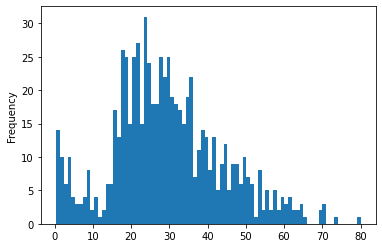

In [18]:
age_mean = df['Age'].mean()
age_median = df['Age'].median()
df['Age'].plot(kind='hist', bins=80)

print('Mean Value for Age column:{}'.format(age_mean))
print('Median Value for Age column:{}'.format(age_median))

From the visualization above, we can see the data has a slightly positive skew. 

In the cell below, replace all null values in the `'Age'` column with the median of the column.  **Do not hard code this value--use the methods from pandas or numpy to make this easier!**  Do this replacement in place on the DataFrame. 

In [19]:
# now that we know the median age we can fill it up in the Dataframe
df['Age'] = df.Age.fillna(value=df.Age.median)

+ Now that we've replaced the values in the `'Age'` column, let's confirm that they've been replaced.  

+ In the cell below, check how many null values remain in the dataset.  

In [20]:
#check results
df.isna().sum()

Unnamed: 0     0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Great! Now we need to deal with the two pesky null values in the `'Embarked'` column.  

### Dropping Rows That Contain Null Values

Perhaps the most common solution to dealing with null values is to simply drop any rows that contain them.  Of course, this is only a good idea if the number dropped does not constitute a significant portion of our dataset.  Often, you'll need to make the overall determination to see if dropping the values is an acceptable loss, or if it is a better idea to just drop an offending column (e.g. the `'Cabin'` column) or to impute placeholder values instead.

In the cell below, use the appropriate built-in DataFrame method to drop the rows containing null values. Do this in place on the DataFrame.  

In [21]:
df.dropna(inplace= True)
df.isna().sum()

Unnamed: 0     0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Great! We've dealt with all the **_obvious_** null values, but we should also take some time to make sure that there aren't symbols or numbers included that are meant to denote a missing value. 

### Missing Values with Placeholders

A common thing to see when working with datasets is missing values denoted with a preassigned code or symbol.  Let's check to ensure that each categorical column contains only what we expect.

In the cell below, return the unique values in the `'Embarked'`, `'Sex'`, `'Pclass'`, and `'Survived'` columns to ensure that there are no values in there that we don't understand or can't account for.  

In [22]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [23]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [24]:
df.Pclass.unique()

array(['3', '1', '2', '?'], dtype=object)

In [25]:
df.Survived.unique()

array([0, 1])

# Imagine if we have a lot of columns, we cannot go through them all one by one. So let's use a for loop

In [26]:
for col in ['Embarked','Sex','Pclass','Survived']:
    print('Value for {}:\n{}\n\n'.format(col,df[col].unique()))

Value for Embarked:
['S' 'C' 'Q']


Value for Sex:
['male' 'female']


Value for Pclass:
['3' '1' '2' '?']


Value for Survived:
[0 1]




It Looks like the `'Pclass'` column contains some missing values denoted by a placeholder! 

In the cell below, investigate how many placeholder values this column contains.  Then, deal with these null values using whichever strategy you believe is most appropriate in this case.  

In [27]:
# note there are 5% of ?
df.Pclass.value_counts(normalize=True)

3    0.527559
1    0.224972
2    0.193476
?    0.053993
Name: Pclass, dtype: float64

In [28]:
#observation : ? accounts for 5% of the data
#method : randomly select a class according to current distribution
rel_prob = [.53,.22,.19]
prob = [i/sum(rel_prob) for i in rel_prob]

In [29]:
def impute_pclass(value):
    if value == '?':
        return np.random.choice(['3','1','2'], p=prob)
    else:
        return value 

In [30]:
df.Pclass = df.Pclass.map(lambda x: impute_pclass(x))
df.Pclass.value_counts(normalize=True)


3    0.56018
1    0.23622
2    0.20360
Name: Pclass, dtype: float64

In [31]:
#checking to see result.
df.Pclass.unique()

array(['3', '1', '2'], dtype=object)

**_Question:_** What is the benefit of treating missing values as a separate valid category?  What is the benefit of removing or replacing them? What are the drawbacks of each? Finally, which strategy did you choose? Explain your choice below. 

Write your answer below this line:
____________

In [ ]:
# Sample response:

# By treating missing values as a separate category, information is preserved. 
# Perhaps there is a reason that this information is missing. 
# By removing or replacing missing information, we can more easily conduct mathematical analyses which require values for computation. 
# I chose to randomly replace for now. I could have just as easily removed the data. 
# Concerns include that I imputed the wrong value (indeed it was a random guess). 
# The strategy for dealing with missing data will depend on our desired application, 
# but regardless of the approach taken, the ramifications of how missing data are handled must be considered. 
# For example, imputing the median of our age reduces variance 
# and assumes that a new value would be close to the center of the distribution 
# (albeit this assumption is statistically likely).

+ Now, let's do a final check to ensure that there are no more null values remaining in this dataset.  

In the cell below, reuse the code you wrote at the beginning of the notebook to check how many null values our dataset now contains. 

In [32]:
df.isna().sum()

Unnamed: 0     0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

+ Great! Those all seem in line with our expectations.  We can confidently say that this dataset contains no pesky null values that will mess up our analysis later on!

## Summary

+ In this section, we learned:

* Strategies for detecting `NaN` values in pandas
* Strategies for detecting missing data denoted by place holder values
* How to deal with missing values by Removing, Replacing, or Keeping them!

* How to detect null values in our dataset
* How to deal with null values by dropping rows
* How to deal with null values by imputing mean/median values 
* Strategies for detecting null values encoded with a placeholder